In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
df= pd.read_csv(r"C:\Users\isa_m\Dropbox\Prueba Big holding\ML\prueba_clientes_bh.csv")
df.head()

,Usuario Afiliado,Recencia,Frecuencia,Ticket promedio,Total ventas
0,id_00000001,25,12,5381832,64581988
1,id_00000002,0,6,5234308,31405850
2,id_00000003,5,9,4498677,40488095
3,id_00000004,6,5,3752627,18763137
4,id_00000005,5,1,3491384,3491384


In [3]:
#Renombrar las columnas del df
df.columns=["usuario_afiliado", "recencia", "frecuencia", "ticket_promedio", "total_ventas"]
df.head()

,usuario_afiliado,recencia,frecuencia,ticket_promedio,total_ventas
0,id_00000001,25,12,5381832,64581988
1,id_00000002,0,6,5234308,31405850
2,id_00000003,5,9,4498677,40488095
3,id_00000004,6,5,3752627,18763137
4,id_00000005,5,1,3491384,3491384


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236613 entries, 0 to 236612
Data columns (total 5 columns):
usuario_afiliado    236613 non-null object
recencia            236613 non-null int64
frecuencia          236613 non-null int64
ticket_promedio     236613 non-null int64
total_ventas        236613 non-null int64
dtypes: int64(4), object(1)
memory usage: 9.0+ MB


In [5]:
stats= df.describe()
stats

,recencia,frecuencia,ticket_promedio,total_ventas
count,236613.000000,236613.000000,2.366130e+05,2.366130e+05
mean,65.622569,2.680854,6.548186e+04,2.158418e+05
std,52.296993,3.562452,7.104346e+04,5.845088e+05
min,0.000000,1.000000,1.050000e+02,1.050000e+02
25%,19.000000,1.000000,2.235000e+04,2.960000e+04
50%,55.000000,1.000000,5.216000e+04,8.092500e+04
75%,106.000000,3.000000,8.665000e+04,2.039260e+05
max,182.000000,146.000000,5.381832e+06,6.458199e+07


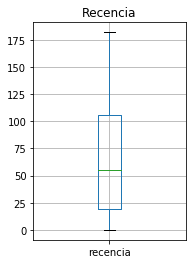

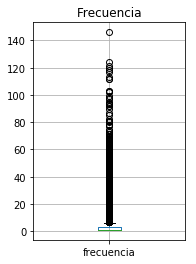

In [6]:

plt.subplot(1,2,1)
df.boxplot(column= 'recencia')
plt.title('Recencia')
plt.show()

plt.subplot(1,2,2)
df.boxplot(column= 'frecuencia')
plt.title('Frecuencia')
plt.show()



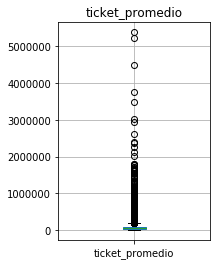

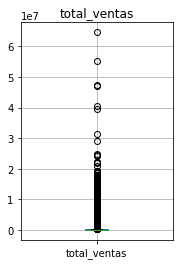

In [7]:
plt.subplot(1,2,1)
df.boxplot(column= 'ticket_promedio')
plt.title('ticket_promedio')
plt.show()

plt.subplot(1,2,2)
df.boxplot(column= 'total_ventas')
plt.title('total_ventas')
plt.show()

In [8]:
#Teniendo en cuenta que el negocio es de retail, se decide retirar del DS cualquier precio por debajo de los 400 pesos.
#Fueron eliminadas 67 filas
df.drop(range(236546, 236612, 1), axis=0, inplace= True)
df.tail()

,usuario_afiliado,recencia,frecuencia,ticket_promedio,total_ventas
236542,id_00236543,35,1,400,400
236543,id_00236544,7,1,400,400
236544,id_00236545,7,1,400,400
236545,id_00236546,6,1,400,400
236612,id_00236613,67,1,105,105


In [9]:
df.drop(236612, axis=0, inplace=True)
df.tail()

,usuario_afiliado,recencia,frecuencia,ticket_promedio,total_ventas
236541,id_00236542,39,1,400,400
236542,id_00236543,35,1,400,400
236543,id_00236544,7,1,400,400
236544,id_00236545,7,1,400,400
236545,id_00236546,6,1,400,400


In [10]:
stats= df.describe()
stats

,recencia,frecuencia,ticket_promedio,total_ventas
count,236546.000000,236546.000000,2.365460e+05,2.365460e+05
mean,65.615386,2.681330,6.550032e+04,2.159029e+05
std,52.295799,3.562844,7.104505e+04,5.845803e+05
min,0.000000,1.000000,4.000000e+02,4.000000e+02
25%,19.000000,1.000000,2.235000e+04,2.965000e+04
50%,55.000000,1.000000,5.218300e+04,8.100000e+04
75%,106.000000,3.000000,8.665000e+04,2.040000e+05
max,182.000000,146.000000,5.381832e+06,6.458199e+07


In [11]:
df.head()

,usuario_afiliado,recencia,frecuencia,ticket_promedio,total_ventas
0,id_00000001,25,12,5381832,64581988
1,id_00000002,0,6,5234308,31405850
2,id_00000003,5,9,4498677,40488095
3,id_00000004,6,5,3752627,18763137
4,id_00000005,5,1,3491384,3491384


# K-means 

Supuestos:

-Las variables están simétricamente distribuidas (no hay sesgos)
-Las variables tienen los mismo valores promedio
-Las variables tienen la misma varianza

In [12]:
#Buscar variables con sesgos:

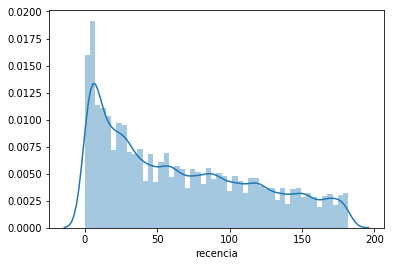

In [13]:
sns.distplot(df['recencia'])
plt.show()

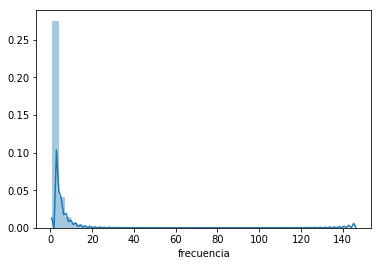

In [14]:
sns.distplot(df['frecuencia'])
plt.show()

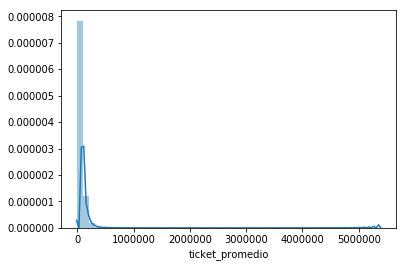

In [15]:
sns.distplot(df['ticket_promedio'])
plt.show()

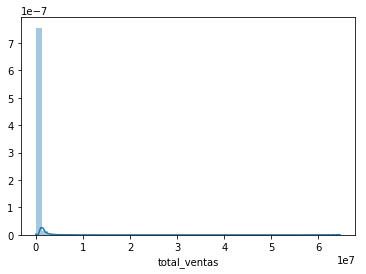

In [16]:
sns.distplot(df['total_ventas'])
plt.show()

In [17]:
import numpy as np

# Transformación de variables:

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236546 entries, 0 to 236545
Data columns (total 5 columns):
usuario_afiliado    236546 non-null object
recencia            236546 non-null int64
frecuencia          236546 non-null int64
ticket_promedio     236546 non-null int64
total_ventas        236546 non-null int64
dtypes: int64(4), object(1)
memory usage: 10.8+ MB


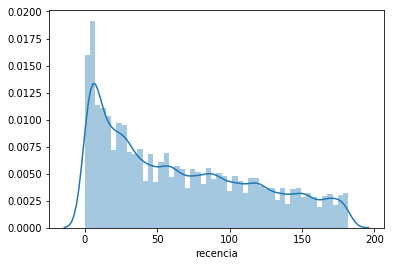

In [19]:
df['recencia']= df['recencia']+0.0001

rec_log= np.log(df['recencia'])
sns.distplot(df['recencia'])
plt.show()

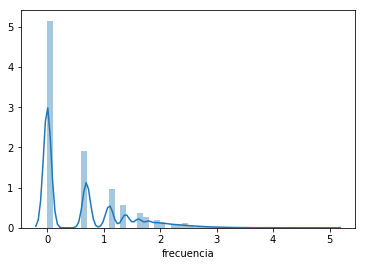

In [20]:
freq_log= np.log(df['frecuencia'])
sns.distplot(freq_log)
plt.show()


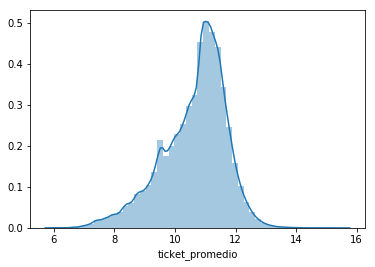

In [21]:
ticket_log= np.log(df['ticket_promedio'])
sns.distplot(ticket_log)
plt.show()

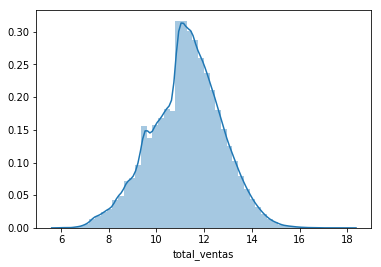

In [22]:
ventas_log= np.log(df['total_ventas'])
sns.distplot(ventas_log)
plt.show()

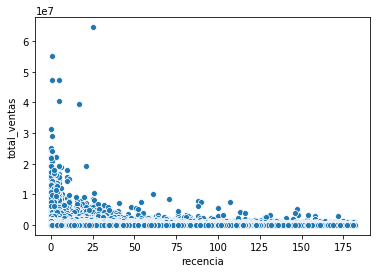

In [23]:
sns.scatterplot(x= 'recencia', y='total_ventas', data= df)

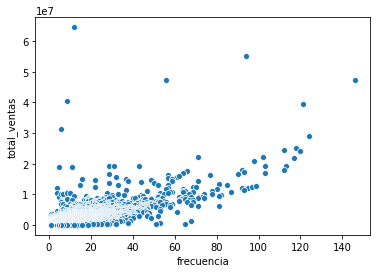

In [24]:
sns.scatterplot(x= 'frecuencia', y='total_ventas', data= df)

In [25]:
corr=df.corr()

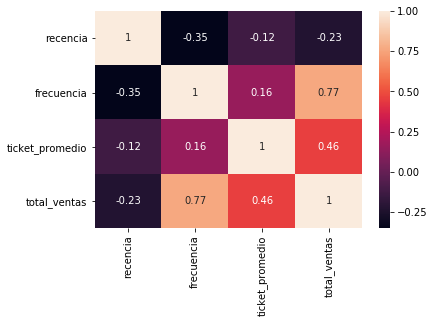

In [26]:
sns.heatmap(corr, 
           xticklabels=corr.columns,
           yticklabels=corr.columns, annot=True)

# Centrado y escalado de variables

In [27]:
df.drop(['usuario_afiliado','ticket_promedio'], axis=1, inplace=True)
df

,recencia,frecuencia,total_ventas
0,25.0001,12,64581988
1,0.0001,6,31405850
2,5.0001,9,40488095
3,6.0001,5,18763137
4,5.0001,1,3491384
5,2.0001,4,12143350
6,158.0001,1,2949250
7,2.0001,4,10494200
8,0.0001,1,2396200
9,39.0001,1,2369450


# Combinar escalado y centrado:

In [28]:
from sklearn.preprocessing import StandardScaler



In [29]:
scaler=StandardScaler()
scaler.fit(df)
df_normalized= scaler.transform(df)

C:\Users\isa_m\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isa_m\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
print('mean: ', df_normalized.mean(axis=0).round(2))
print('std: ', df_normalized.std(axis=0).round(2))

mean:  [0. 0. 0.]
std:  [1. 1. 1.]


# Entrenar modelo. Definir número de Clusters

In [31]:
from sklearn.cluster import KMeans

In [32]:
#Iniciar modelo
model= KMeans(n_clusters=2, random_state=1)

In [33]:
#Entrenar modelo
model.fit(df_normalized)

cluster_labels= model.labels_

In [34]:
df_k2= df.assign(Cluster= cluster_labels)

In [35]:
df_k2.groupby(['Cluster']).agg({
    'recencia': 'mean',
    'frecuencia': 'mean',
    'total_ventas': ['mean', 'count'],
}).round(2)

recencia frecuencia total_ventas        
            mean       mean         mean   count
Cluster                                         
0          69.33       2.00    129033.60  221082
1          12.50      12.41   1457834.24   15464

In [36]:
#Ajustar Kmeans y calcular SSE para cada K

sse= {}




In [37]:
for k in range(1,11):
    model= KMeans(n_clusters =k, random_state=1)
    model.fit(df_normalized)
    sse[k]= model.inertia_
   


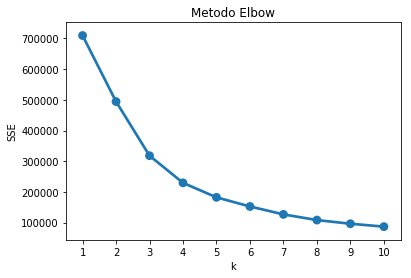

In [38]:
#Graficar SSE para cada K

plt.title('Metodo Elbow')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [39]:
#Modelo con 3 clusters de acuerdo al Elbow Criterion
model_3= KMeans(n_clusters=3, random_state=1)

In [40]:
#Entrenar modelo
model_3.fit(df_normalized)

cluster_labels_3= model_3.labels_

df_k3= df.assign(Cluster= cluster_labels_3)

df_k3.groupby(['Cluster']).agg({
    'recencia': 'mean',
    'frecuencia': 'mean',
    'total_ventas': ['mean', 'count'],
}).round(2)

recencia frecuencia total_ventas        
            mean       mean         mean   count
Cluster                                         
0          29.99       2.81    200333.04  134687
1         121.70       1.34     76639.74   93624
2          10.63      15.81   2053841.09    8235

In [41]:
df_k3['label']= cluster_labels_3

El cluster 2 es el que tiene menor recencia media, mayor frecuencia y mayor total de ventas en promedio. 
Se asigna al Grupo Alto.

El Cluster 0 se asigna al grupo Medio. Es el siguiente con menor recencia y mayor frecuencia de compra.

Por último, el cluster 1 se asigna al grupo bajo. Son los clientes con mayor recencia y menor frecuencia de compra


In [42]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [43]:
df_k3.head()

,recencia,frecuencia,total_ventas,Cluster,label
0,25.0001,12,64581988,2,2
1,0.0001,6,31405850,2,2
2,5.0001,9,40488095,2,2
3,6.0001,5,18763137,2,2
4,5.0001,1,3491384,2,2


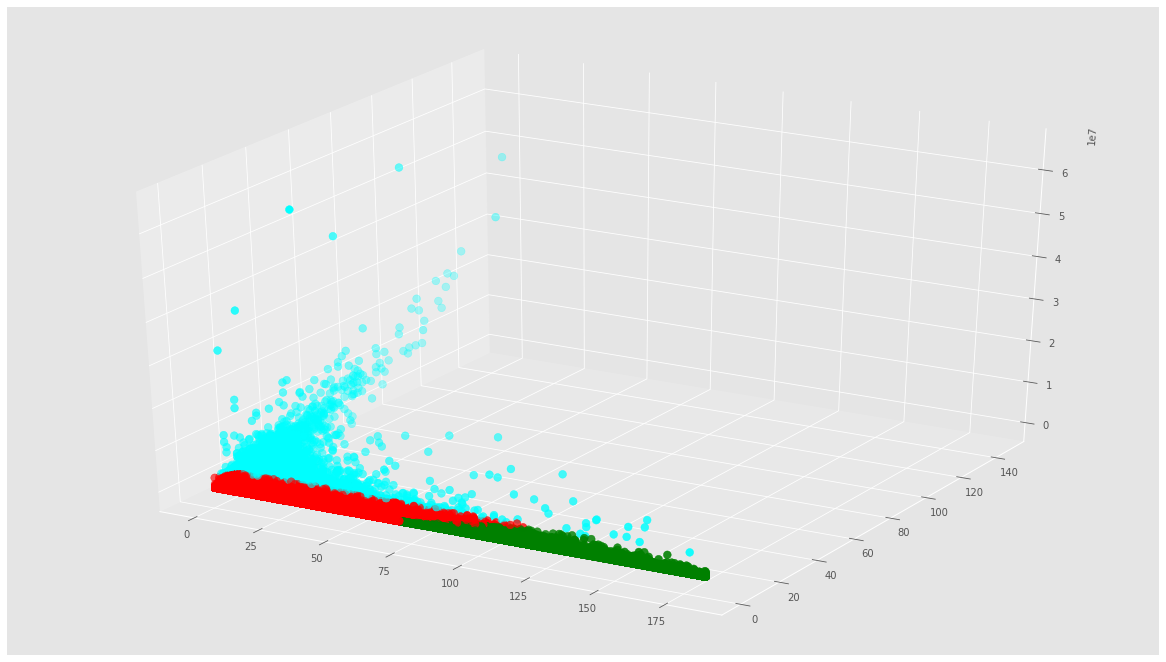

In [44]:
cluster_labels_3= model_3.labels_
C = model_3.cluster_centers_



colores=['red','green','cyan']
asignar=[]
for row in cluster_labels_3:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df_k3['recencia'], df_k3['frecuencia'], df_k3['total_ventas'], c=asignar,s=60)
#ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)